In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn graphviz

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import export_graphviz

In [10]:
data = pd.read_csv('CarPrice.csv')
(data.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


C:\Users\ATHARVA NERKAR\AppData\Local\Temp\ipykernel_18796\777915219.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


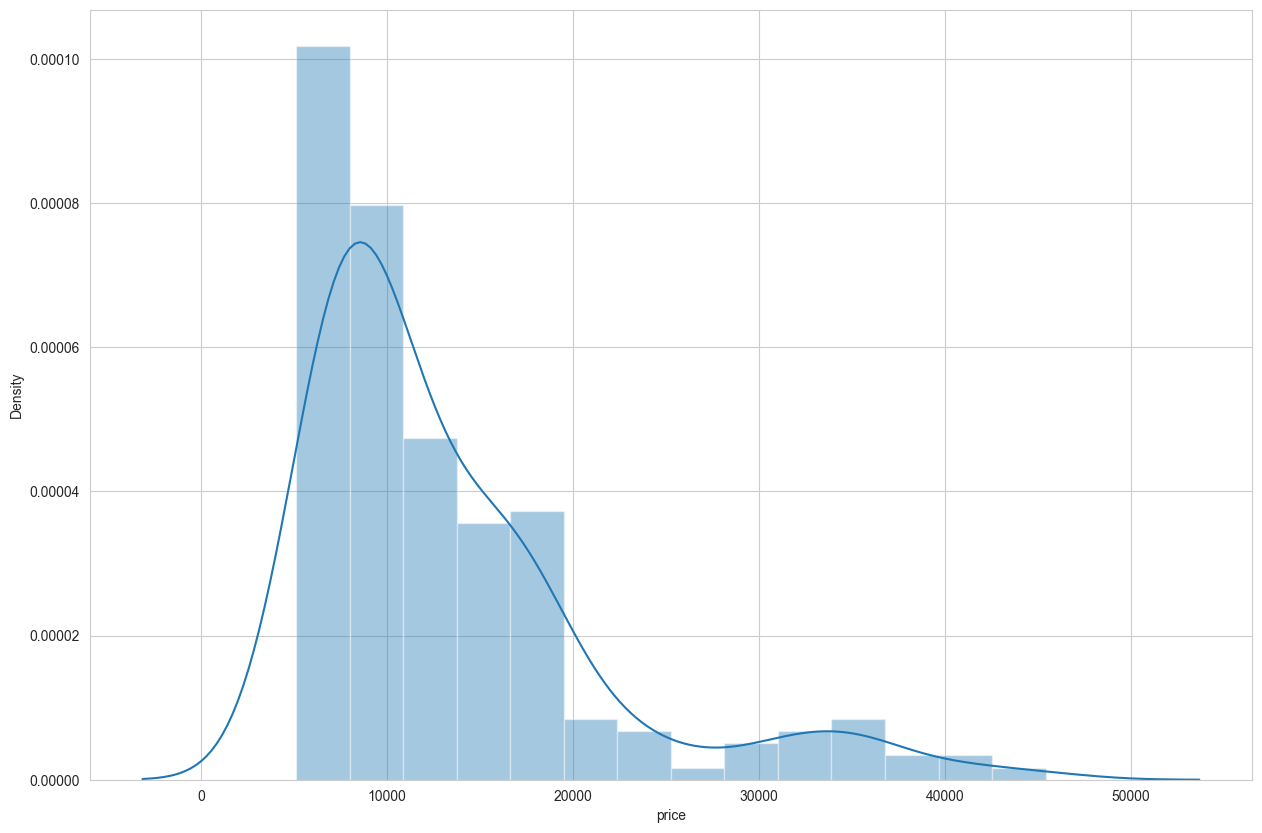

In [11]:
# Exploratory Data Analysis
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.show()

In [12]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
print(data.CarName.unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [16]:
print(data.carbody.unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


C:\Users\ATHARVA NERKAR\AppData\Local\Temp\ipykernel_18796\3510825061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


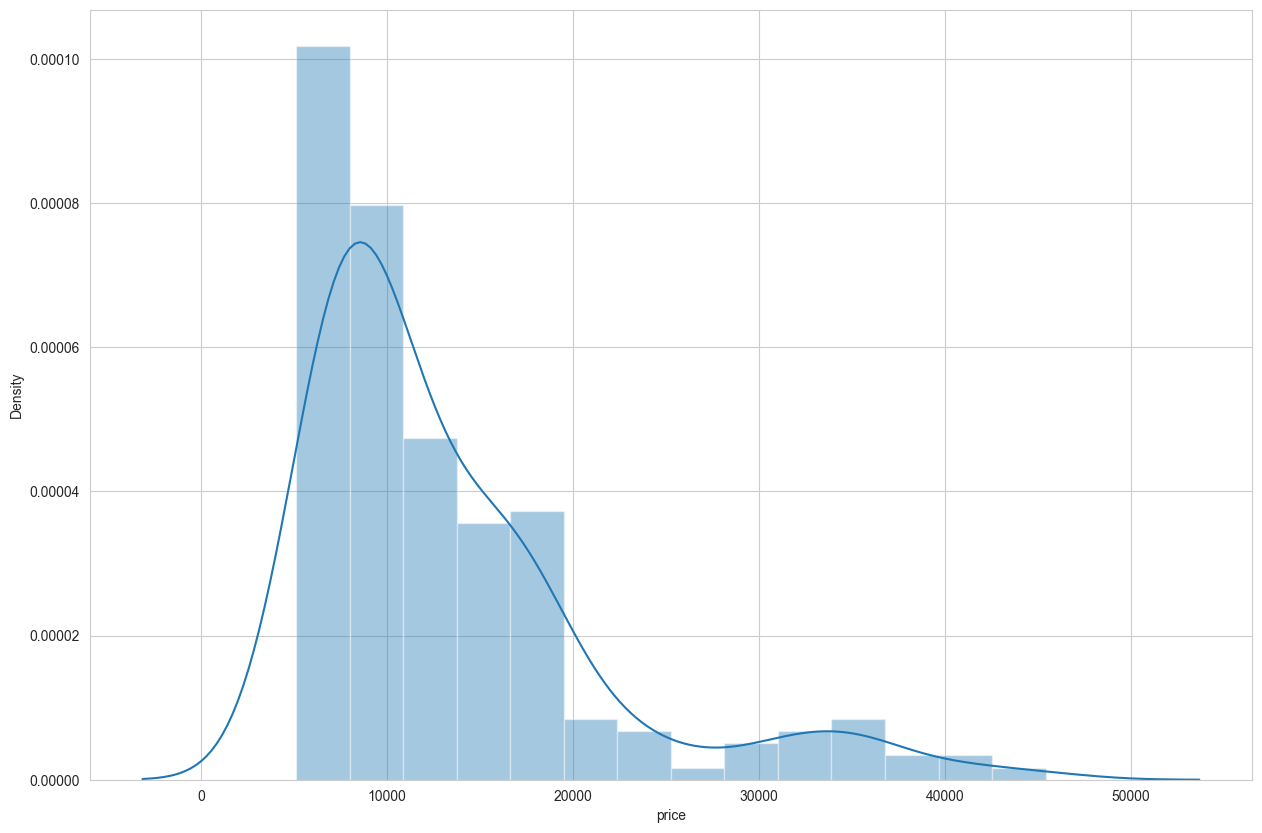

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.show()

In [18]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlations = data[numerical_cols].corr()
print(correlations)

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

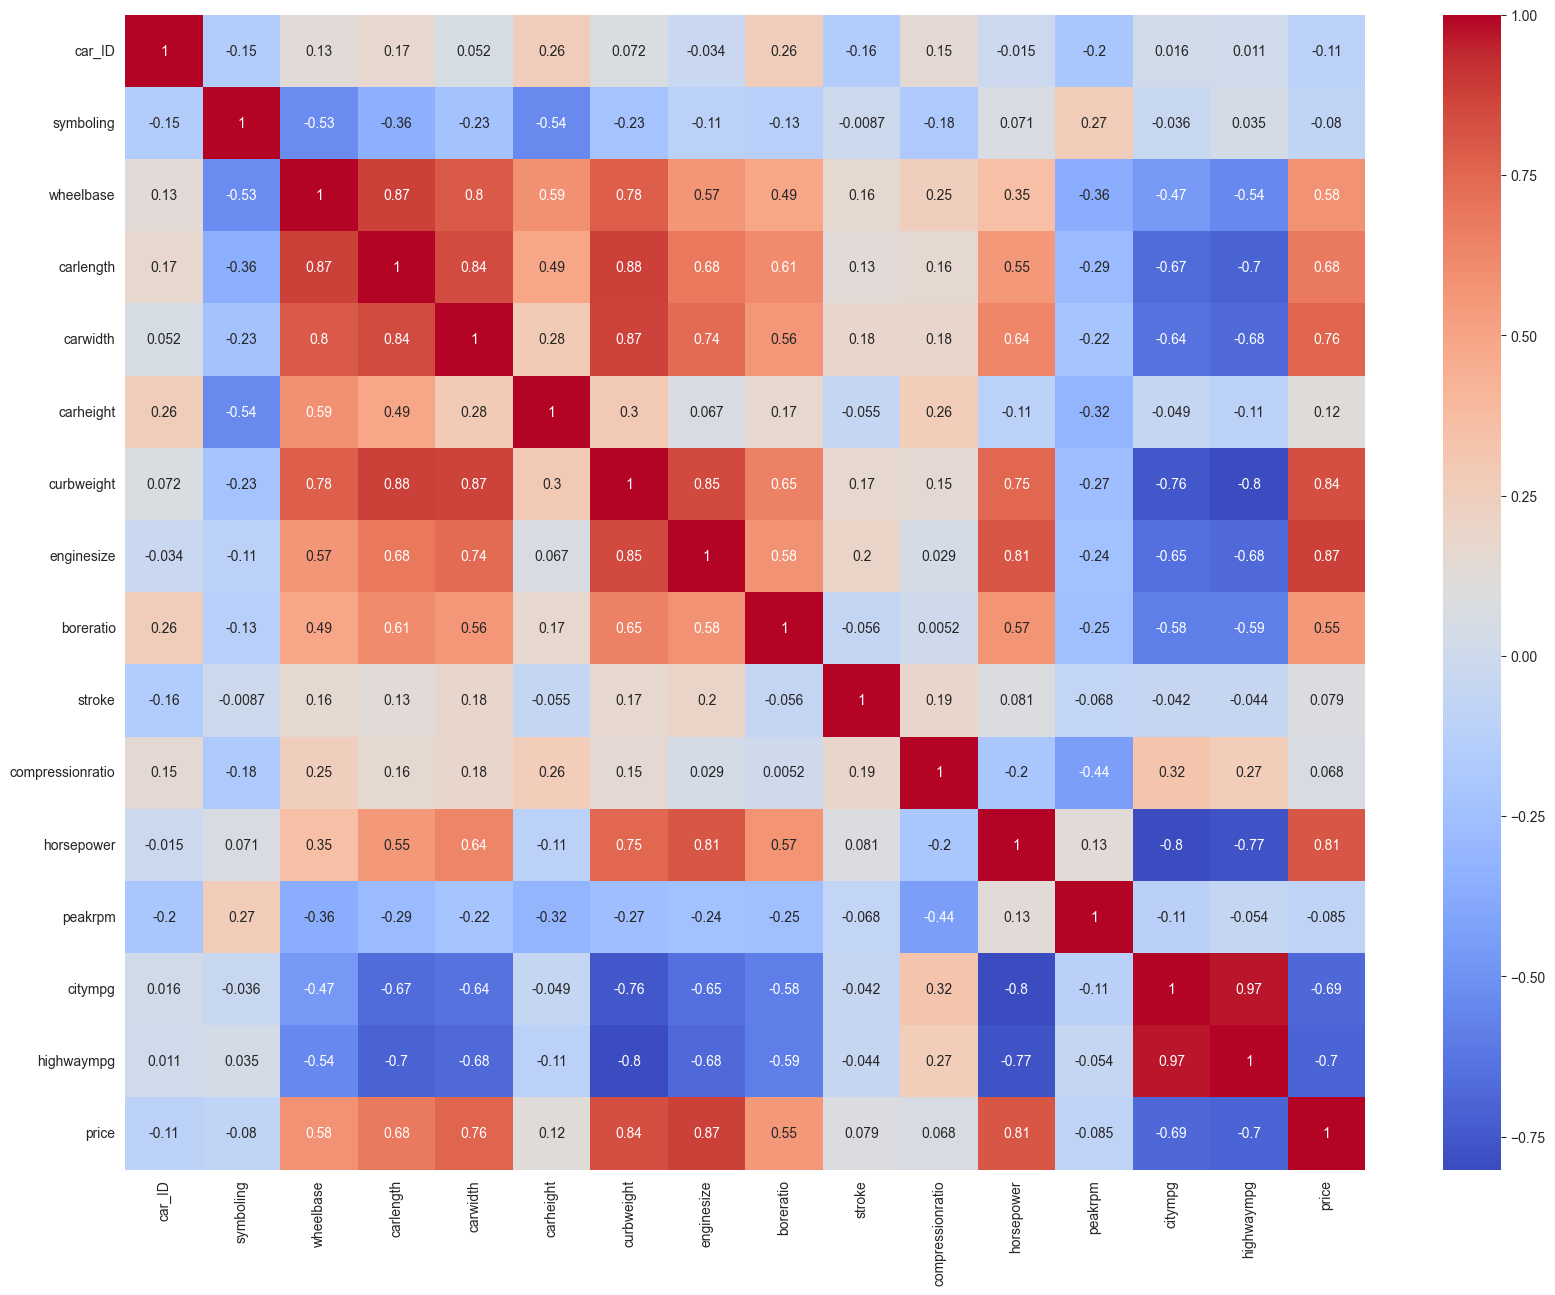

In [19]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [20]:
# Prepare the data for modeling
predict = "price"
data = data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]

X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 1823.39
R-squared: 0.90


In [28]:
# Visualize the decision tree
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree",format="png")


'decision_tree.png'

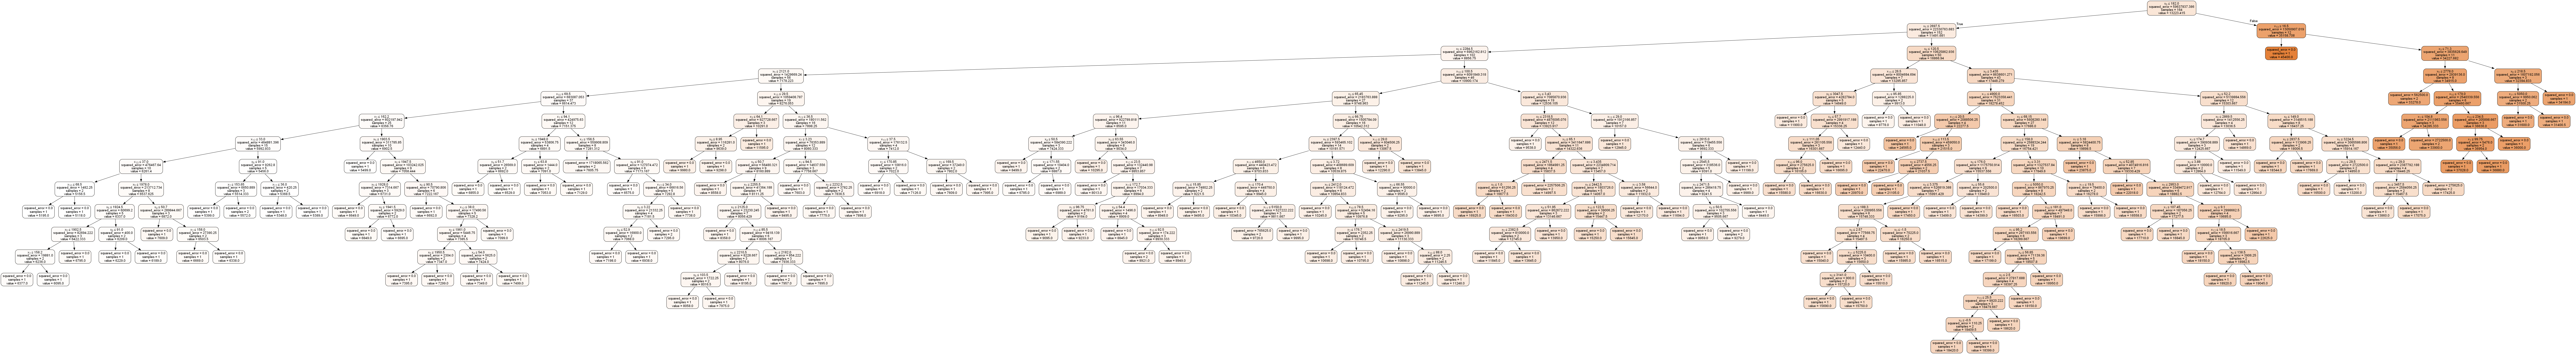

In [29]:
# Display the decision tree as an image
from IPython.display import Image
Image(filename="decision_tree.png")